Loading and preprocessing Player Totals data...
Calculating per-game statistics...
Converted total stats to per-game and dropped original columns.
Processed Player Totals data: 2546 players

Player Totals columns after initial processing:
<class 'pandas.core.frame.DataFrame'>
Index: 2546 entries, 14843 to 12688
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   season                   2546 non-null   int64  
 1   player                   2546 non-null   object 
 2   lg                       2546 non-null   object 
 3   tm                       2546 non-null   object 
 4   fg_percent               2546 non-null   float64
 5   x3p_percent              2546 non-null   float64
 6   ft_percent               2546 non-null   float64
 7   Total Rebounds per game  2546 non-null   float64
 8   Assists per game         2546 non-null   float64
 9   Steals per game          2546 non-null   float64
 10  B

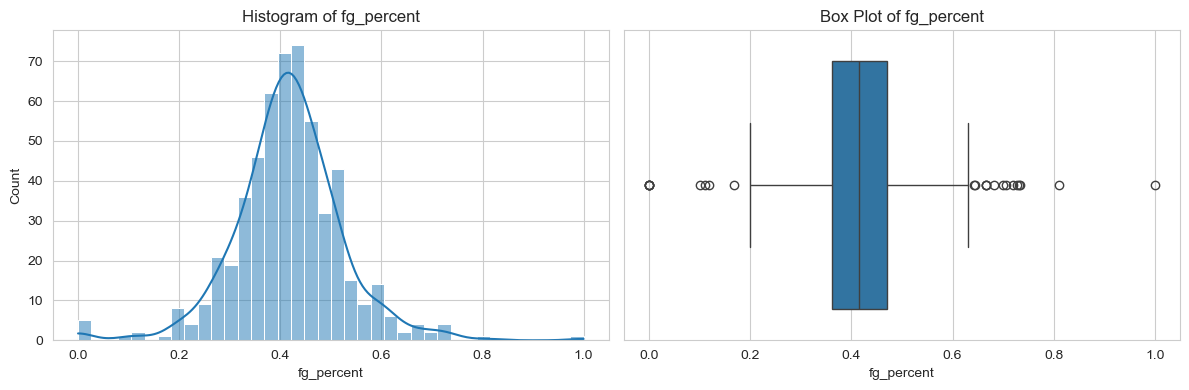


Analyzing column: x3p_percent



Analyzing column: ft_percent



Analyzing column: Total Rebounds per game



Analyzing column: Assists per game


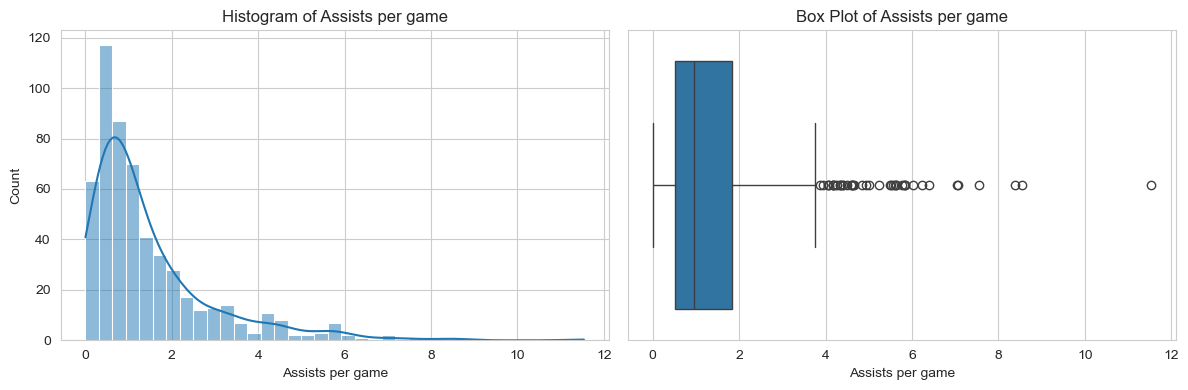


Analyzing column: Steals per game



Analyzing column: Blocks per game



Analyzing column: Turnovers per game


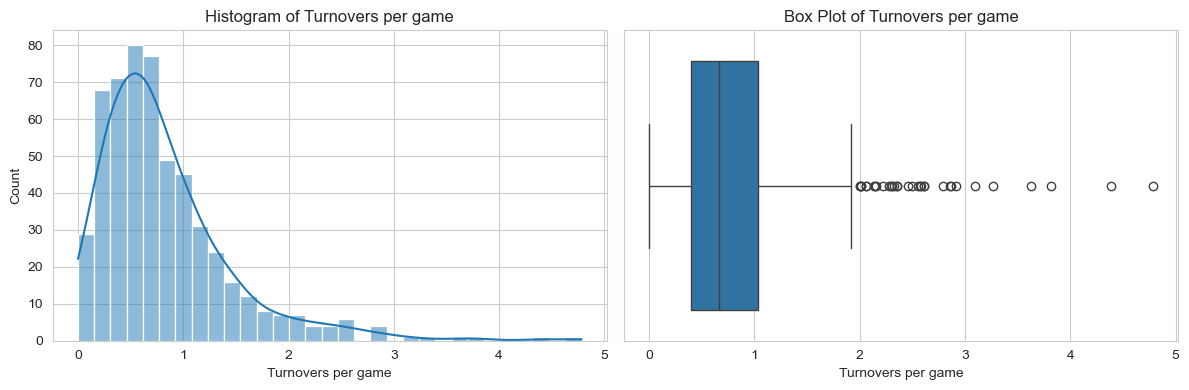


Analyzing column: Points per game


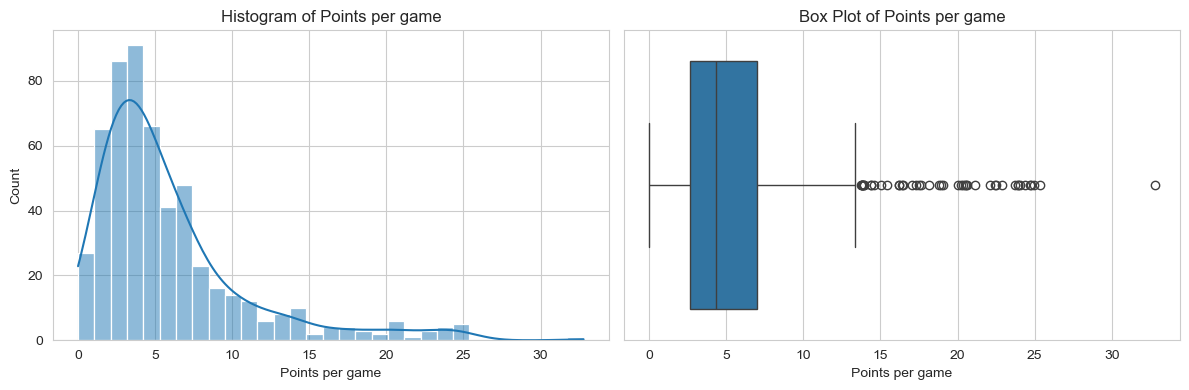


Distributions for Combine Measurements 

Analyzing column: height


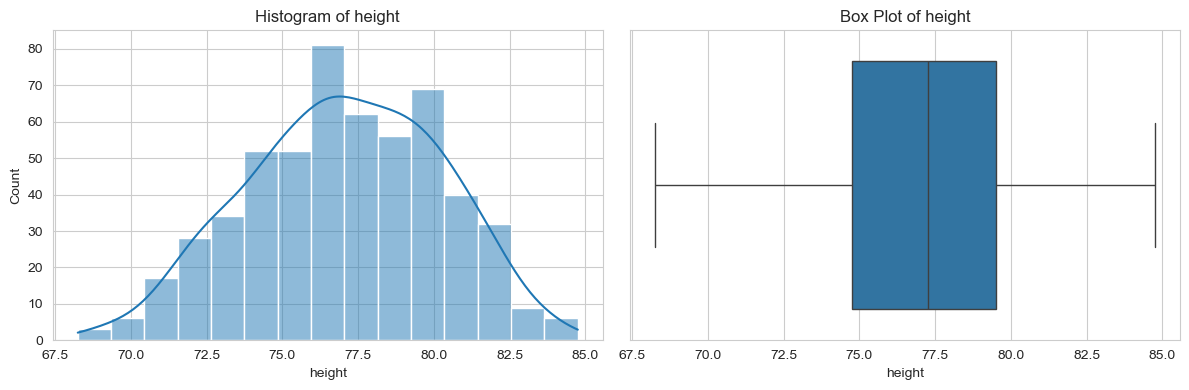


Analyzing column: weight


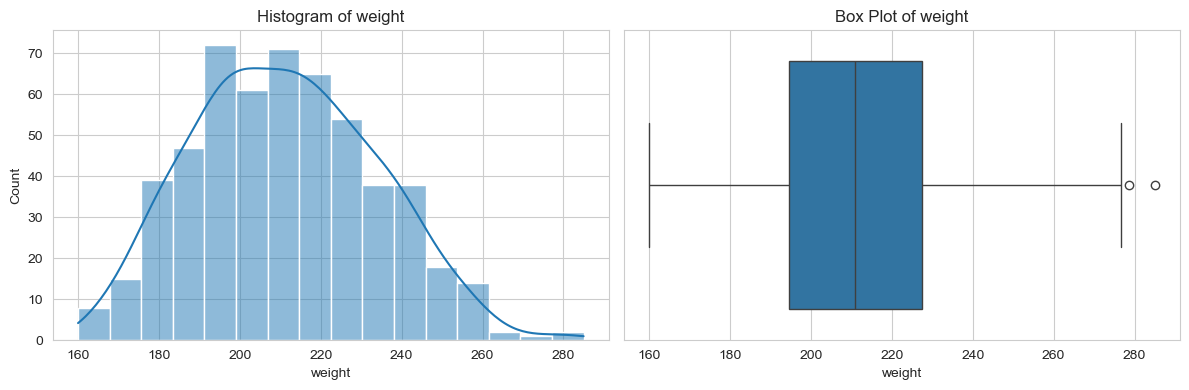


Analyzing column: wingspan


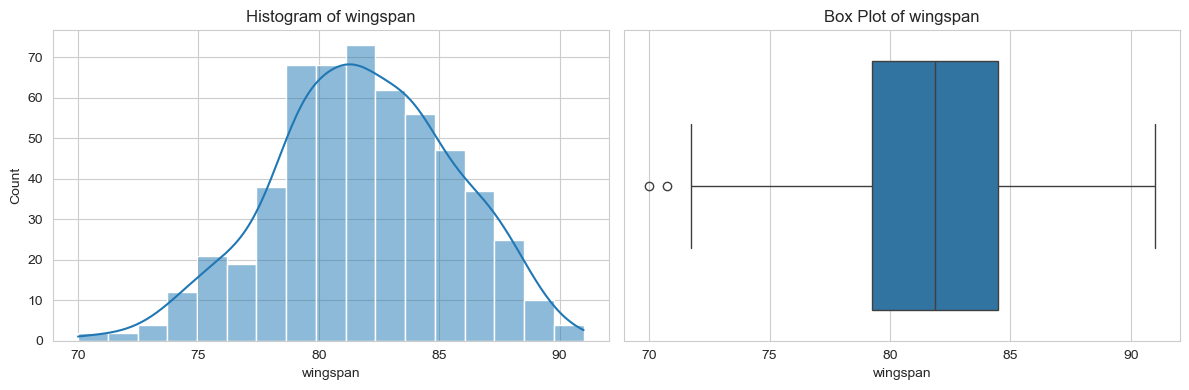


Analyzing column: reach_standing


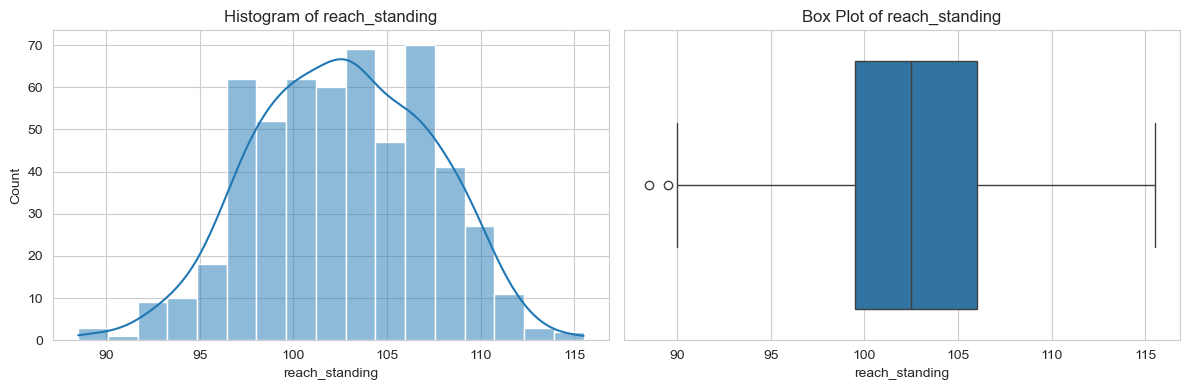


Analyzing column: standing_vertical



Analyzing column: max_vertical



Analyzing column: bench_reps



Analyzing column: timeLaneAgility


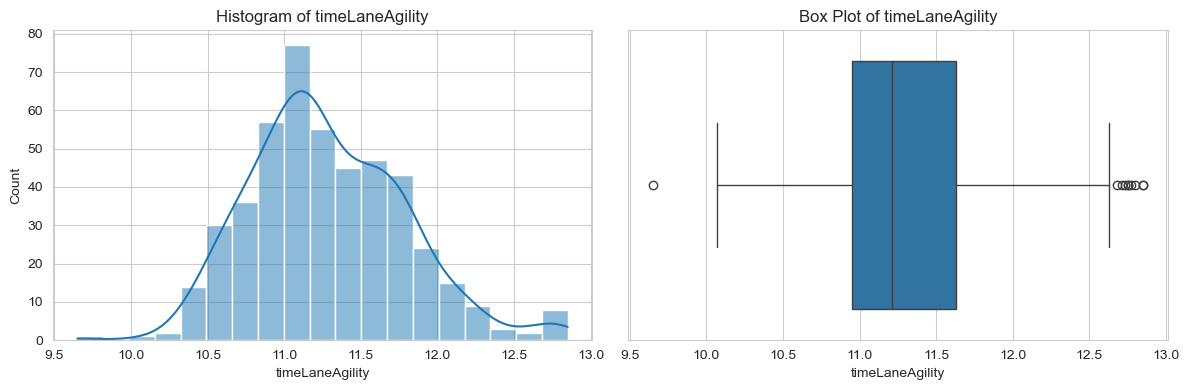


Analyzing column: timeThreeQuarterCourtSprint


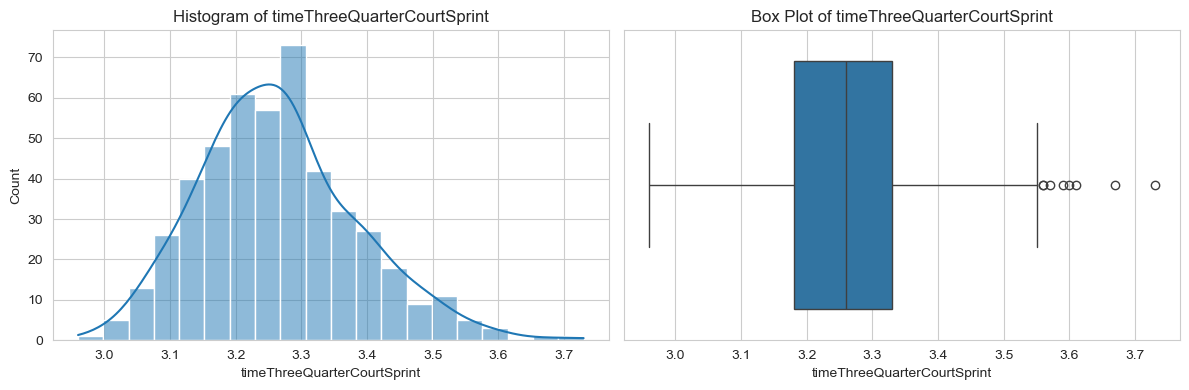


Analyzing column: timeModifiedLaneAgility


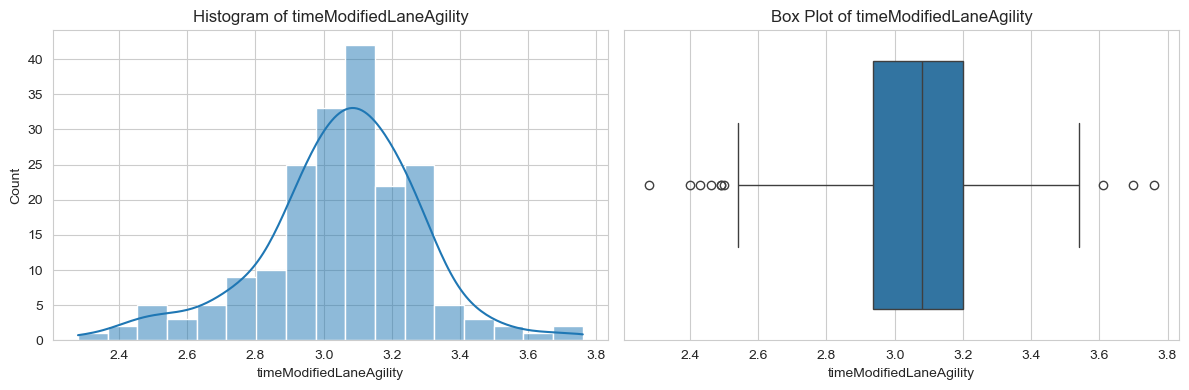


Analyzing column: lengthHandInches


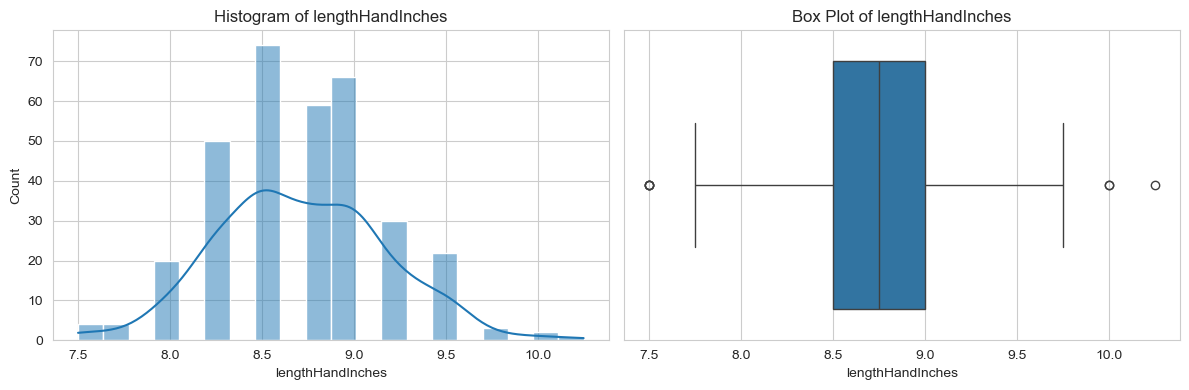


Analyzing column: widthHandInches


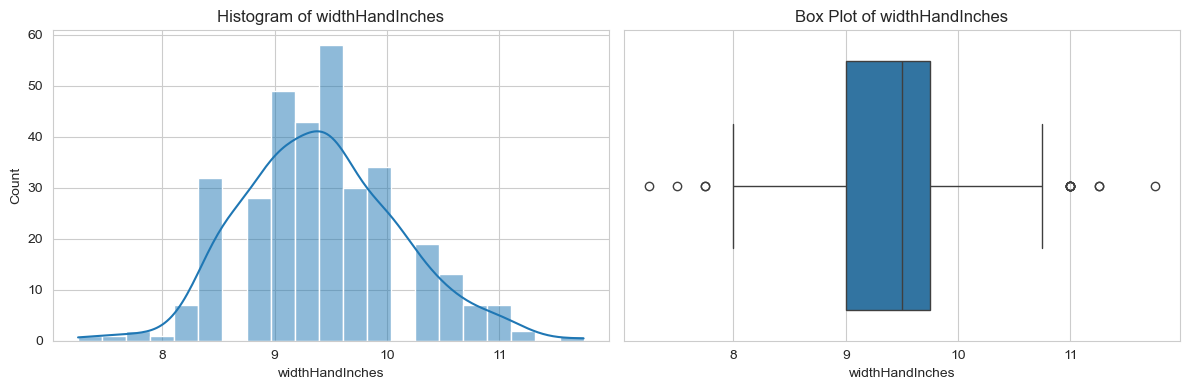


Analyzing column: body_fat_pct


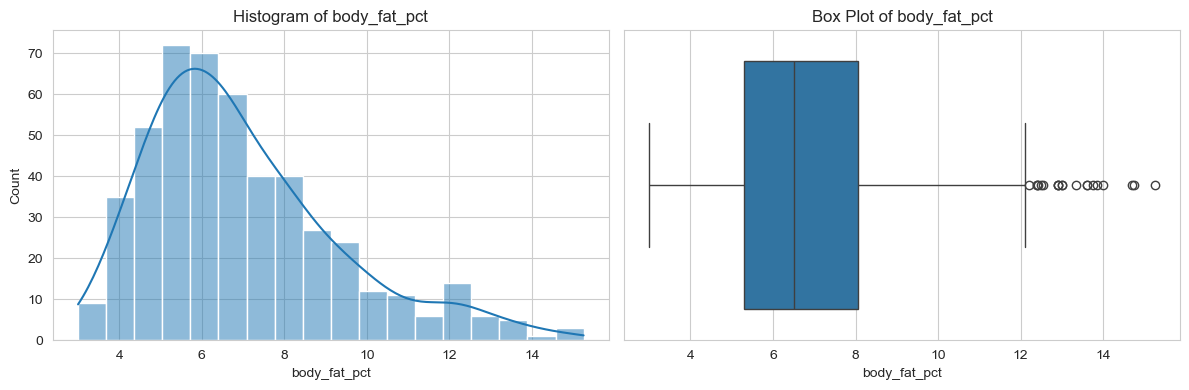


EDA Step 3: Correlations 

1. Correlation Matrix Heatmap (Player Stats & Combine Measurements):



Strong Correlations (|corr| > 0.5):
reach_standing vs height: 0.916
reach_standing vs wingspan: 0.886
Assists per game vs Turnovers per game: 0.834
wingspan vs height: 0.810
standing_vertical vs max_vertical: 0.806
Turnovers per game vs Points per game: 0.776
Assists per game vs Points per game: 0.740
height vs weight: 0.730
wingspan vs lengthHandInches: 0.707
weight vs wingspan: 0.706
weight vs reach_standing: 0.701
Assists per game vs Steals per game: 0.689
Points per game vs Steals per game: 0.675
Total Rebounds per game vs Points per game: 0.672
Total Rebounds per game vs Blocks per game: 0.671
Turnovers per game vs Steals per game: 0.648
lengthHandInches vs reach_standing: 0.605
weight vs lengthHandInches: 0.580
Total Rebounds per game vs Steals per game: 0.535
height vs lengthHandInches: 0.533
Turnovers per game vs Total Rebounds per game: 0.531
lengthHandInches vs widthHandInches: 0.530
weight vs body_fat_pct: 0.510
max_vertical vs timeThreeQuarterCourtSprint: -0.517

2. Scatte

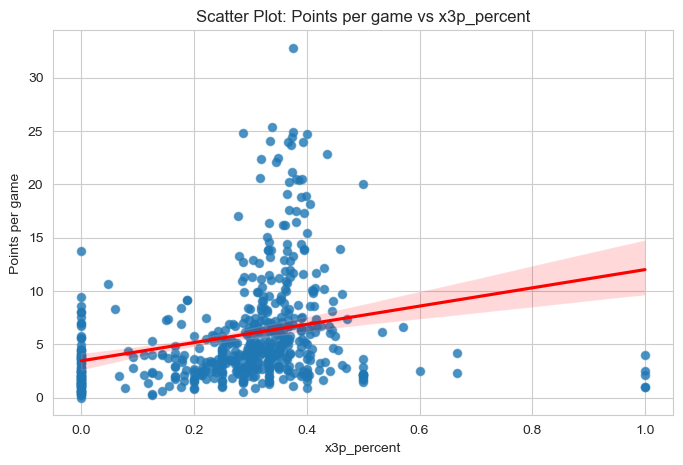

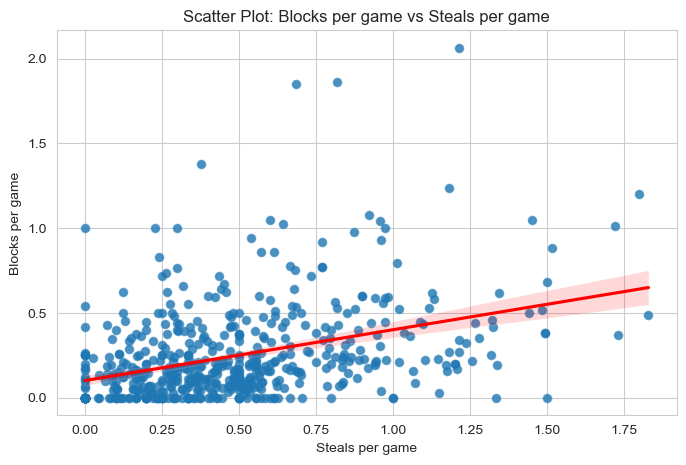

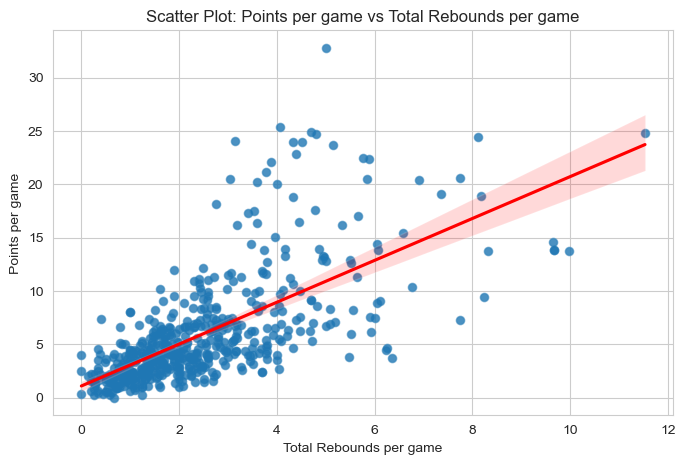

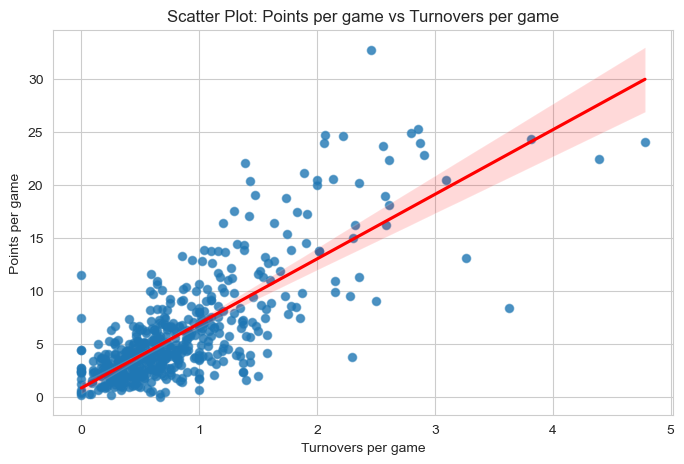


   B) Combine Measurement vs. Player Stat Relationships:


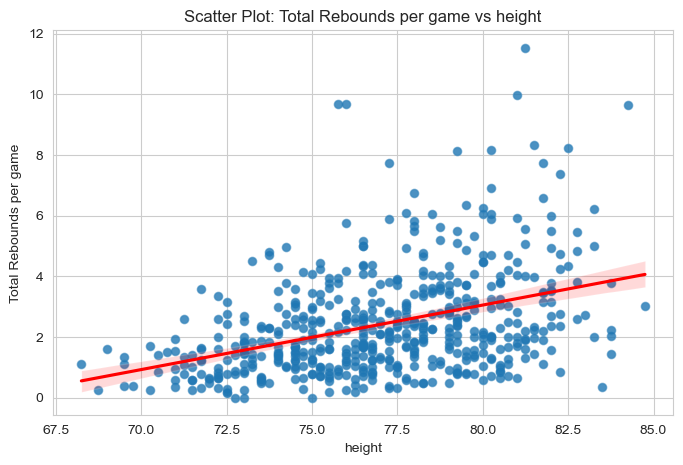

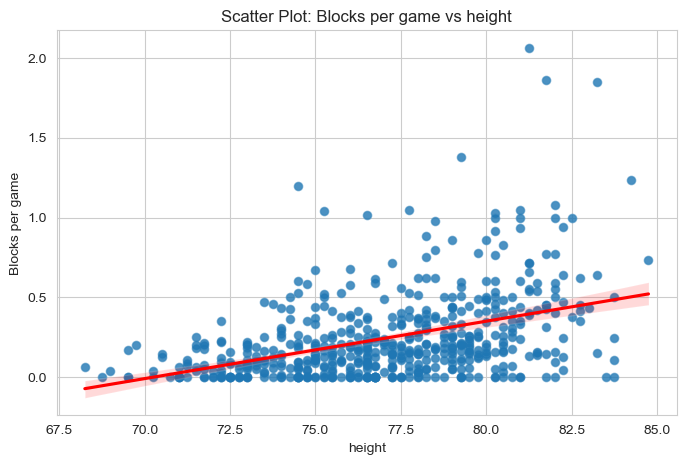

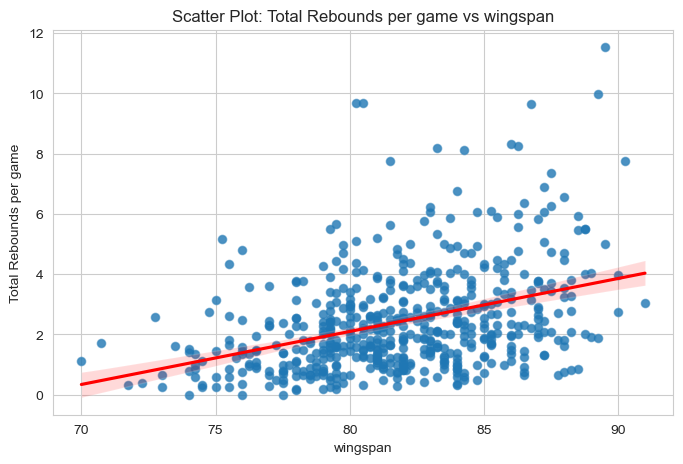

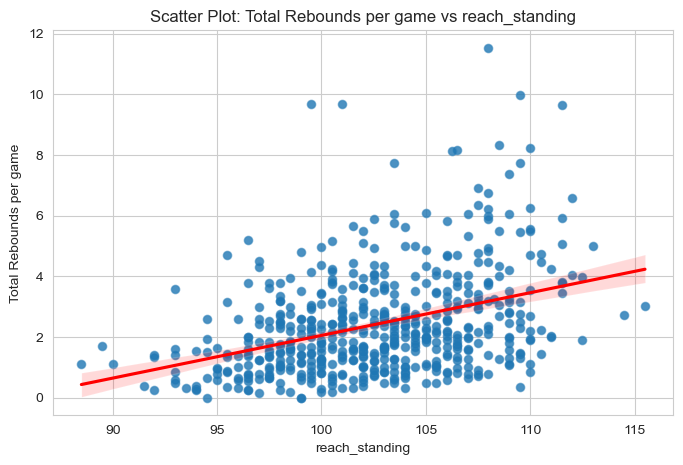

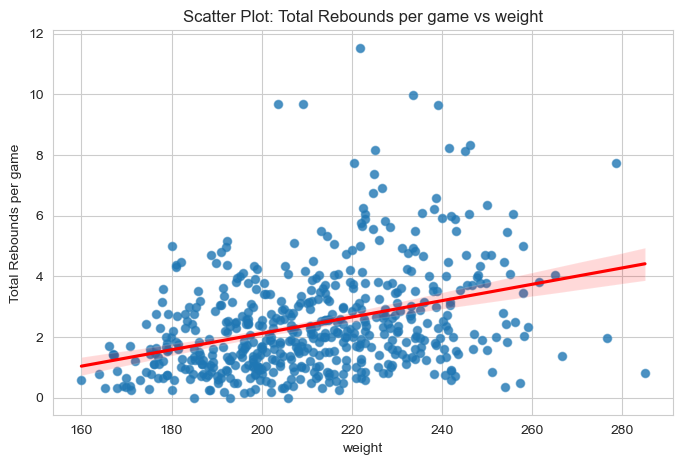

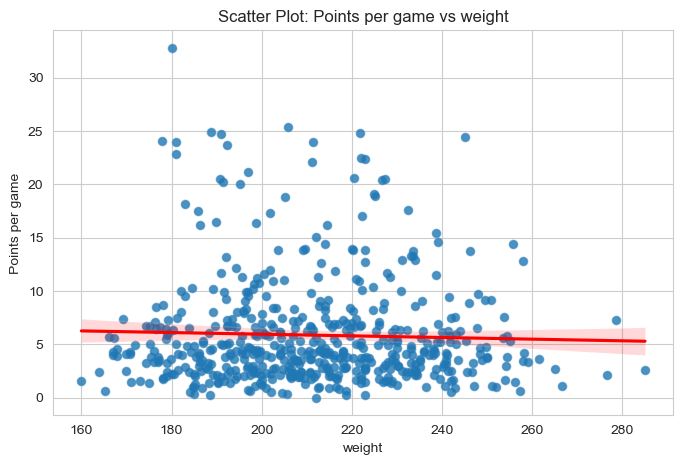

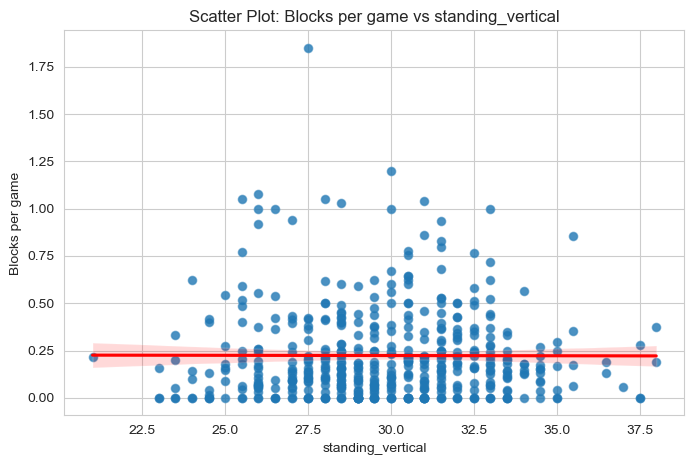

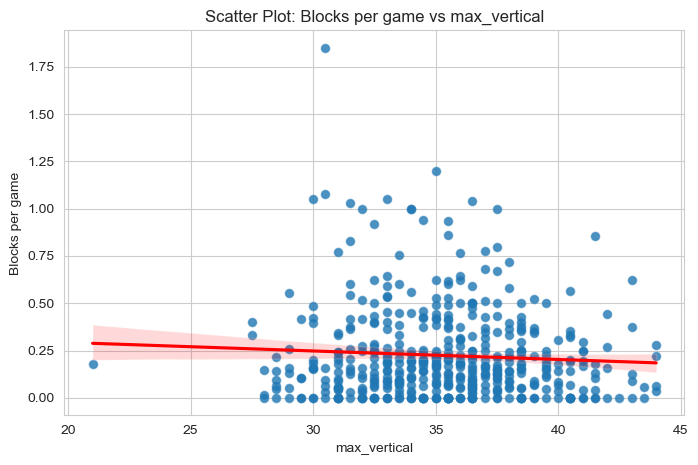

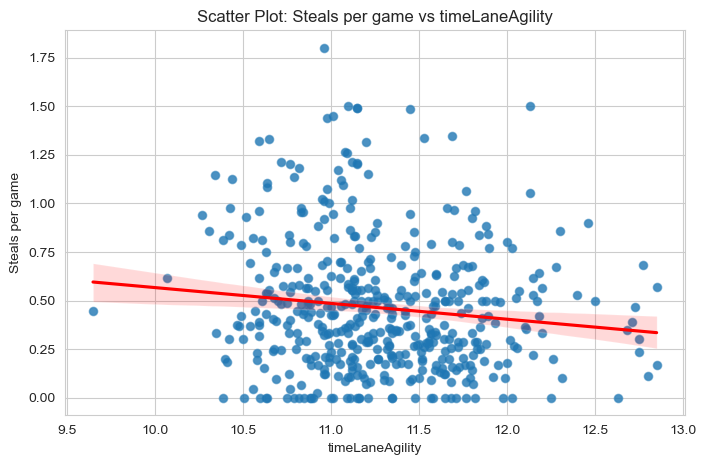

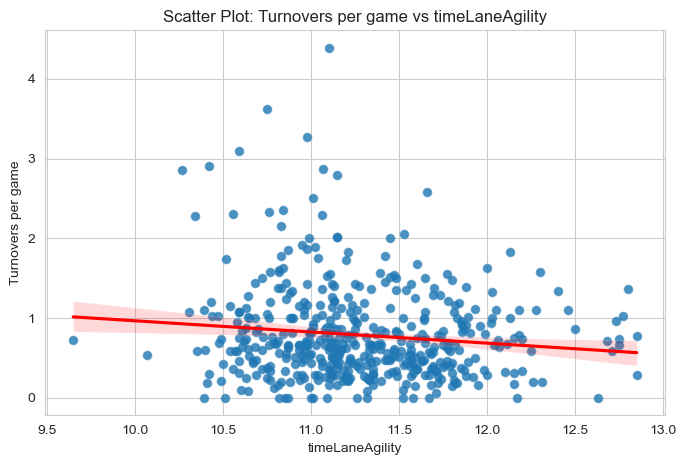

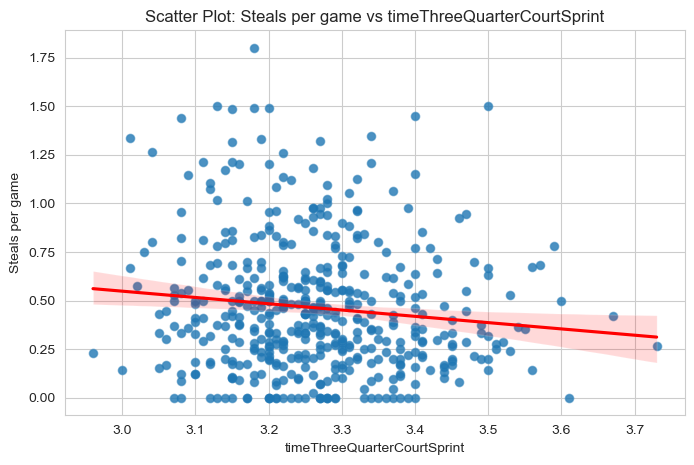

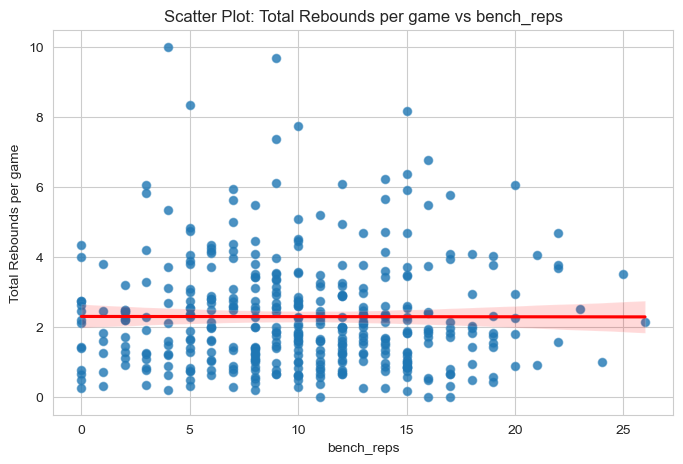

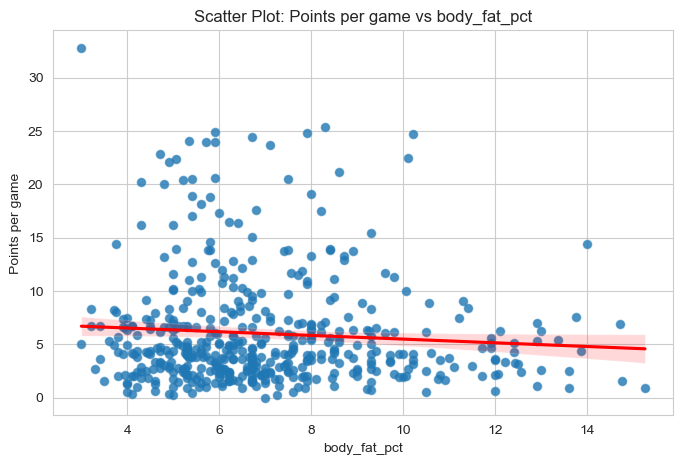

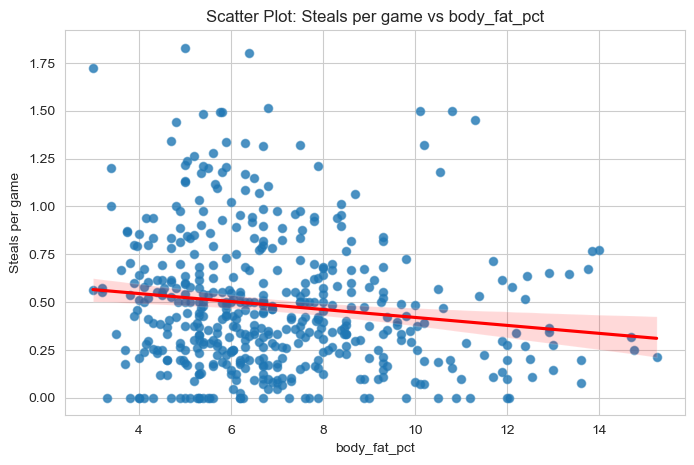


   C) Relationships Within Combine Measurements:


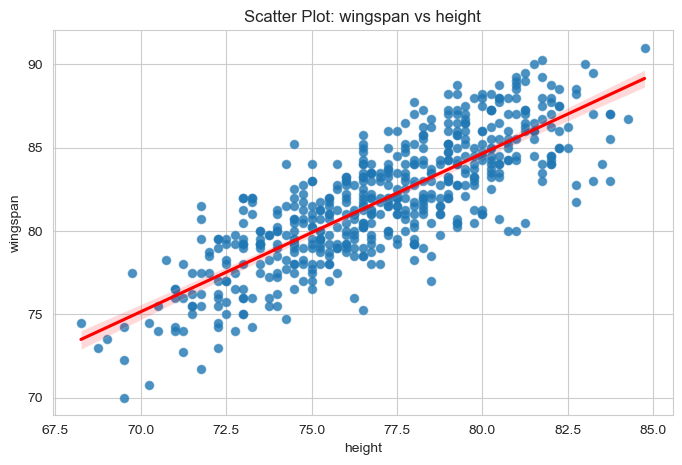

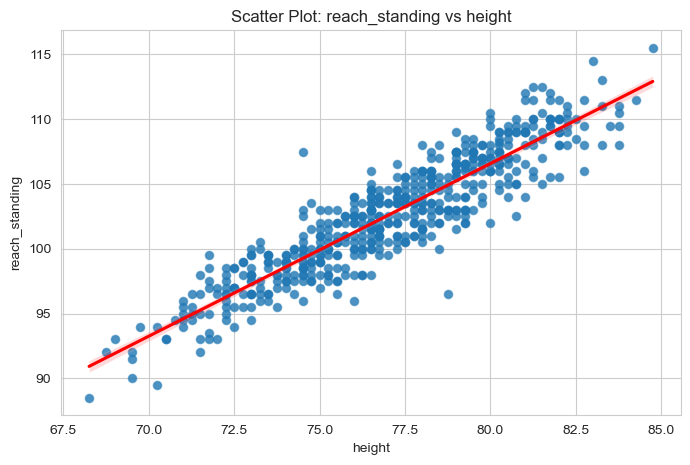

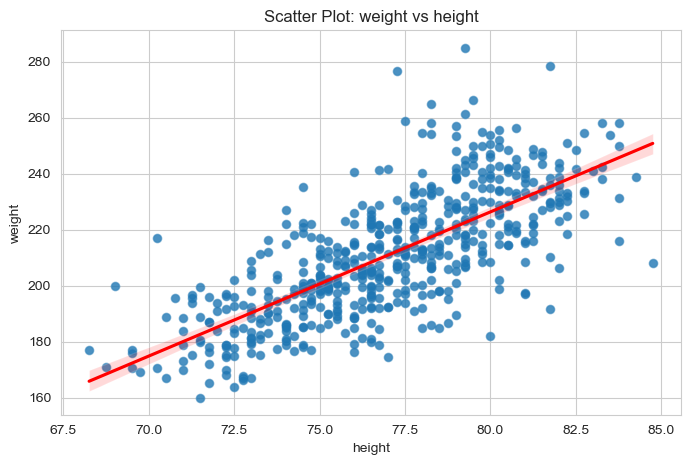

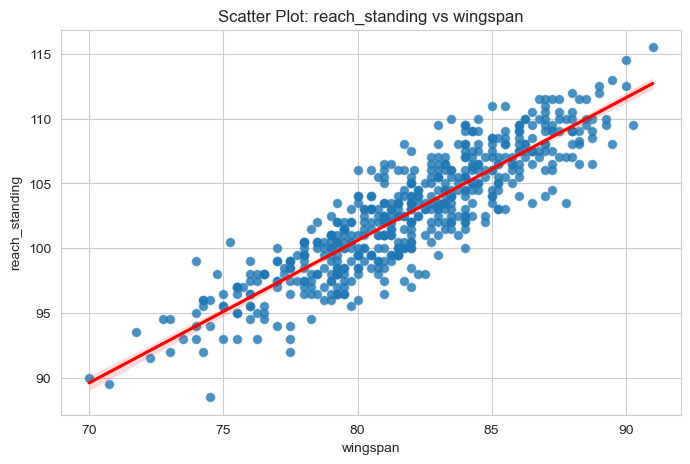

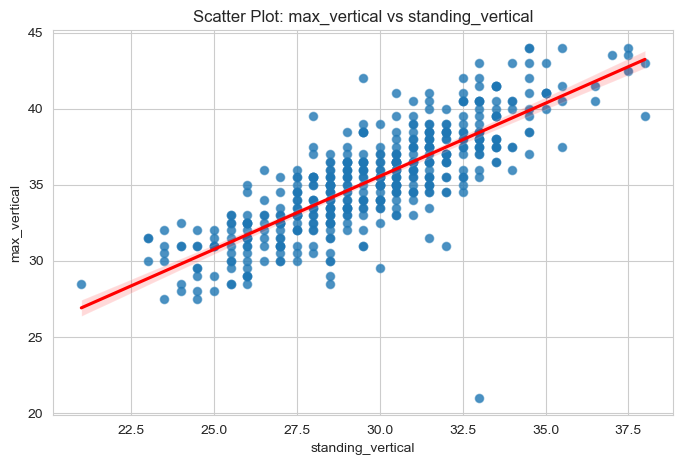

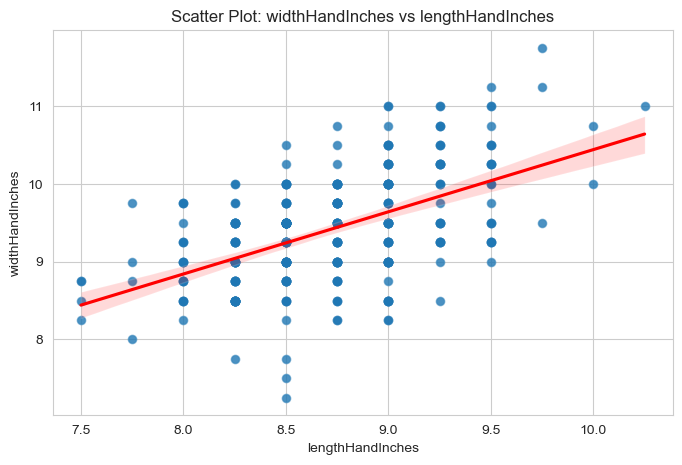

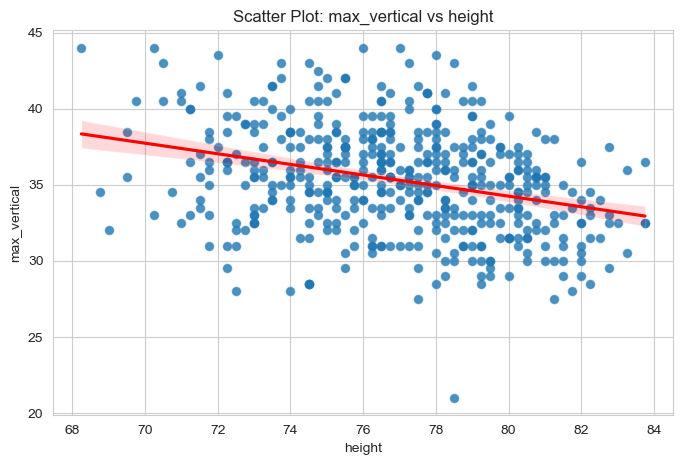


EDA Step 4: Analysis Over Time (Based on Player's Most Recent Season) 

4A: Player Statistics Trends 

Mean Player Statistics (Per Game) by Season:
        fg_percent  x3p_percent  ft_percent  Total Rebounds per game  \
season                                                                 
2021      0.396857     0.257095    0.772571                 2.032031   
2022      0.422122     0.280220    0.757146                 2.315058   
2023      0.449258     0.298581    0.718806                 2.632843   
2024      0.457577     0.278923    0.719000                 2.425511   
2025      0.469172     0.325555    0.754031                 3.999136   

        Assists per game  Steals per game  Blocks per game  \
season                                                       
2021            1.179012         0.424116         0.285936   
2022            1.094296         0.423910         0.237086   
2023            1.280046         0.454239         0.234886   
2024            1.156668         0.4

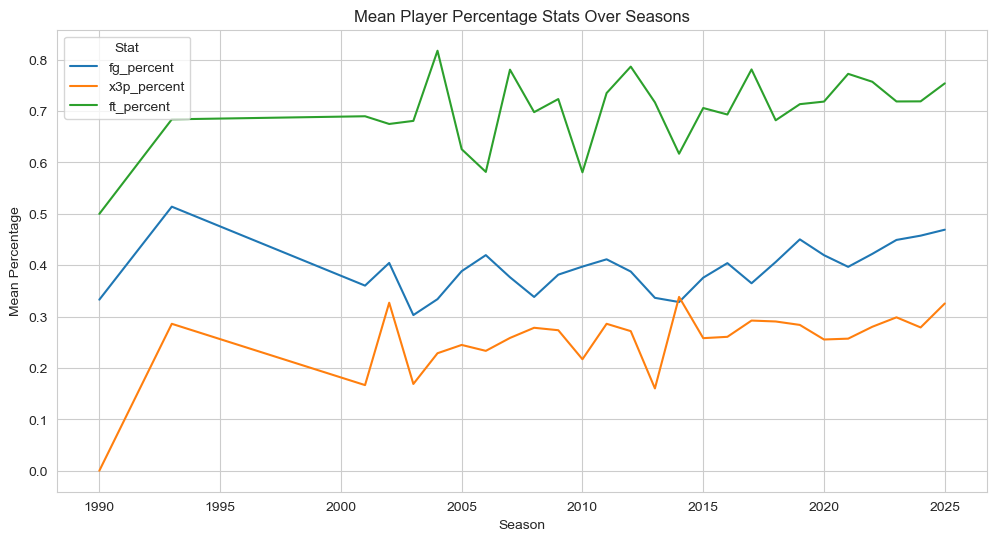

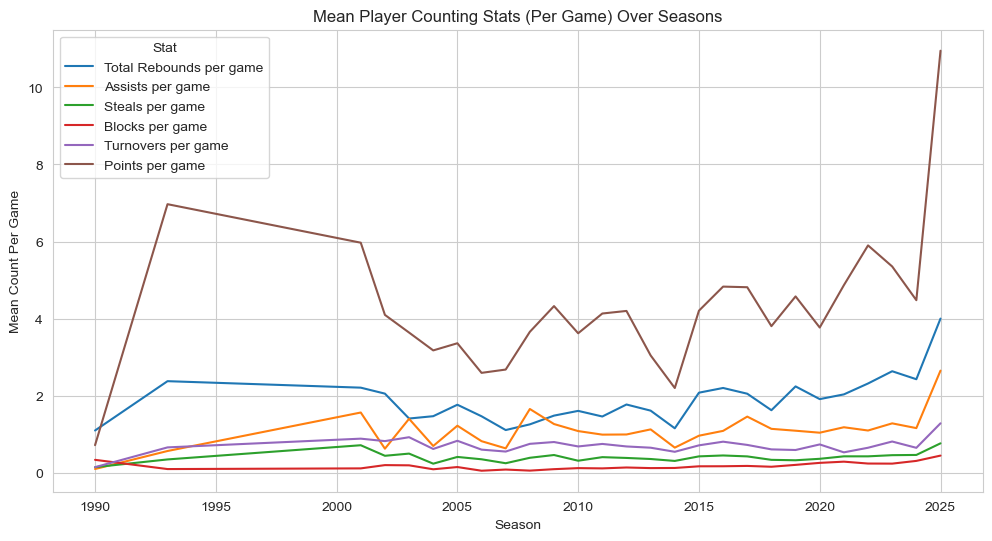


4B: Combine Measurement Trends 

Mean Combine Measurements by Season:
           height      weight   wingspan  reach_standing  standing_vertical  \
season                                                                        
2021    77.309524  210.961905  82.952381      103.166667          30.850000   
2022    76.695122  210.641463  81.628049      101.865854          30.513158   
2023    78.532258  216.703333  83.604839      104.709677          29.977273   
2024    78.615385  216.988462  83.192308      105.038462          29.333333   
2025    77.564961  214.670635  82.373047      103.143701          29.901042   

        max_vertical  bench_reps  timeLaneAgility  \
season                                              
2021       35.900000   11.571429        11.230500   
2022       36.631579    9.269231        11.330263   
2023       35.659091    8.944444        11.414545   
2024       35.166667    8.500000        11.528500   
2025       35.755208    9.840580        11.154316   

   

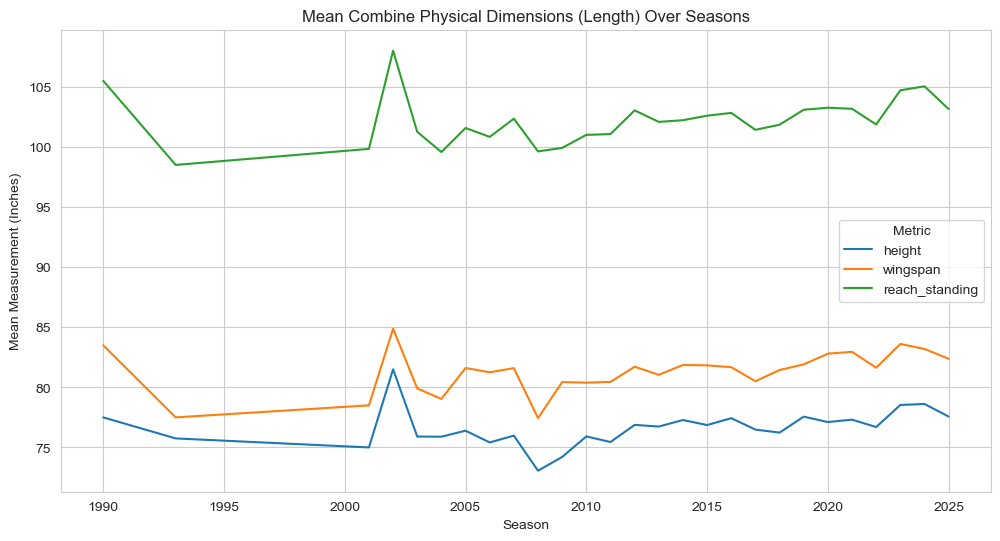

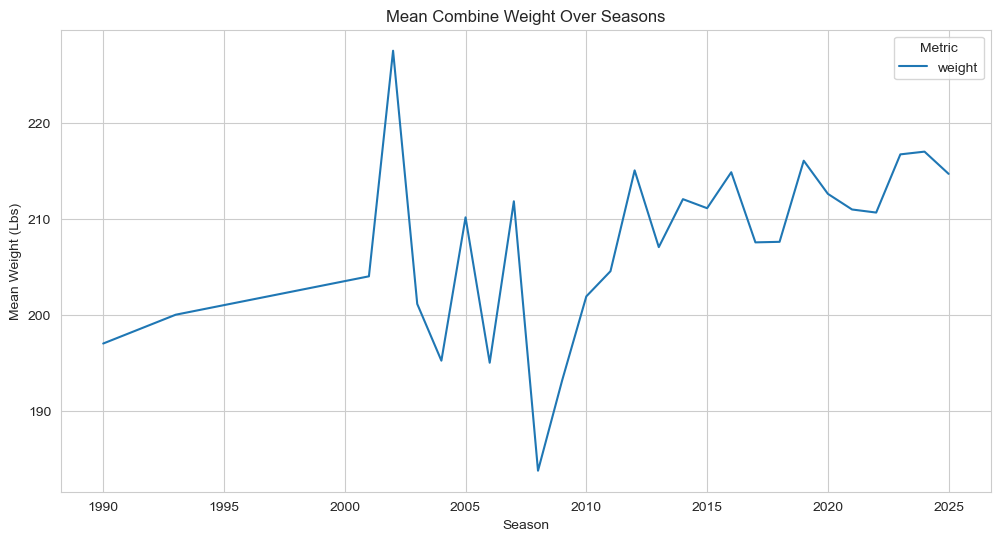

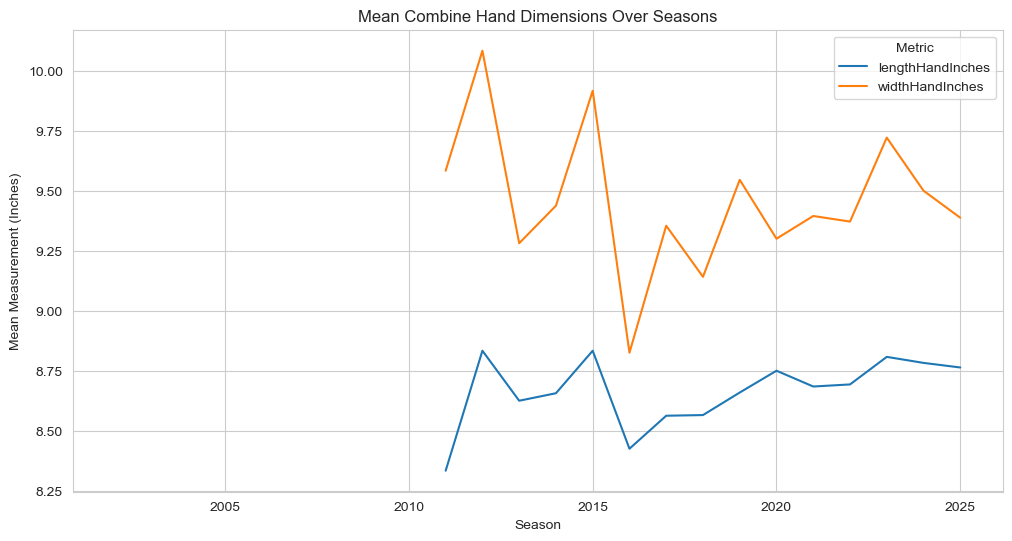

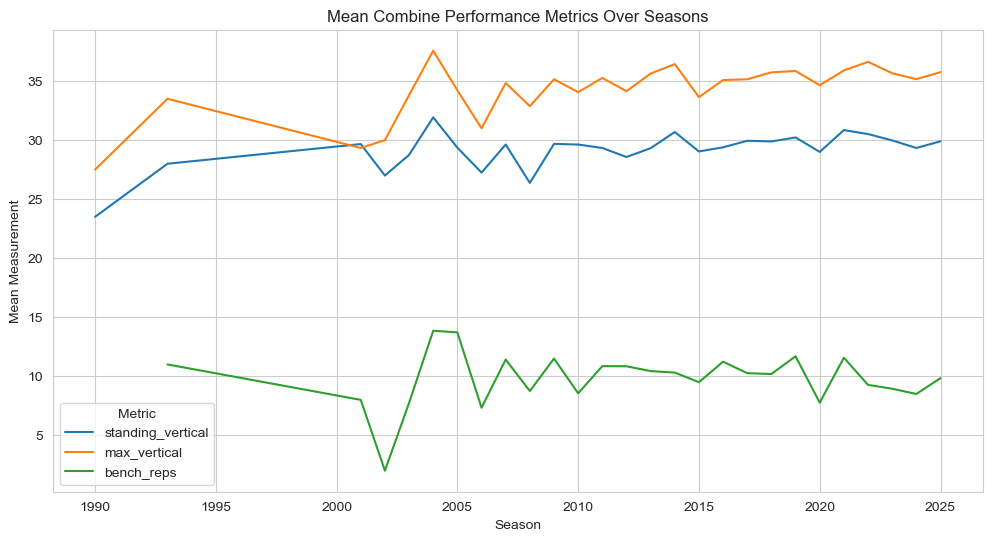

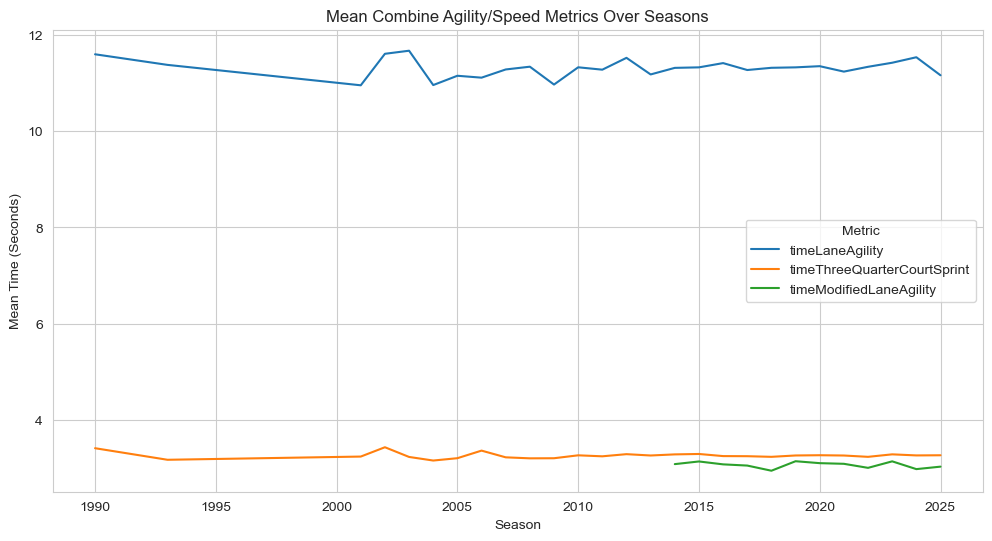

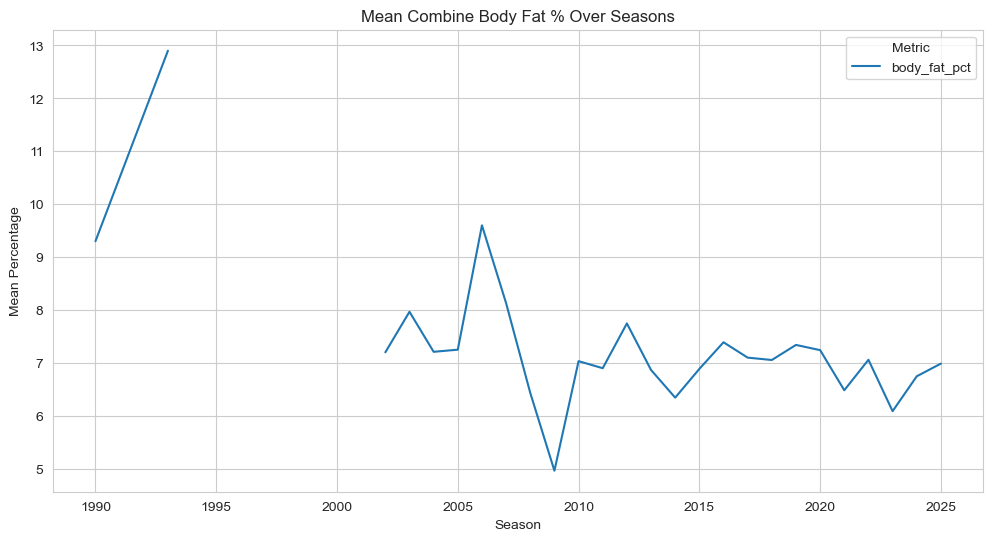


EDA including Combine Data Complete 


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load and Preprocess Player Totals Data
print("Loading and preprocessing Player Totals data...")
df_totals = pd.read_csv('Player Totals.csv')

# Drop specified columns from Player Totals
columns_to_drop_totals = [
    'seas_id', 'player_id', 'birth_year', 'pos', 'age', 'experience',
    'orb', 'drb', 'pf', 'gs', 'mp', 'fg', 'fga', 'x2pa', 'x2p_percent',
    'e_fg_percent', 'ft', 'fta', 'x2p', 'x3p', 'x3pa'
]

# Check which columns actually exist before dropping
columns_to_drop_totals = [col for col in columns_to_drop_totals if col in df_totals.columns]
df_totals.drop(columns=columns_to_drop_totals, inplace=True)

# Define a mapping from original acronyms to new full names
stat_name_map = {
    'trb': 'Total Rebounds per game',
    'ast': 'Assists per game',
    'stl': 'Steals per game',
    'blk': 'Blocks per game',
    'tov': 'Turnovers per game',
    'pts': 'Points per game'
}

# Define counting stats to convert to per-game and check if 'g' (games played) column exists
counting_stats_to_convert = list(stat_name_map.keys())
if 'g' in df_totals.columns:
    print("Calculating per-game statistics...")
    for stat_acronym, new_name in stat_name_map.items():
        if stat_acronym in df_totals.columns:
            # Calculate per-game stat using the new, descriptive column name
            df_totals[new_name] = (df_totals[stat_acronym] / df_totals['g']).replace([np.inf, -np.inf], np.nan)

    # Drop the original total columns and the 'g' column as they are now redundant
    columns_to_drop_after_calc = counting_stats_to_convert + ['g']
    df_totals.drop(columns=columns_to_drop_after_calc, inplace=True, errors='ignore')
    print("Converted total stats to per-game and dropped original columns.")
else:
    print("Warning: 'g' (games played) column not found. Cannot calculate per-game stats.")

# Filter out ABA league
df_totals = df_totals[df_totals['lg'] != 'ABA']

# Keep only the most recent season stat line for each player
df_totals = df_totals.sort_values(by=['player', 'season'], ascending=[True, False])
df_totals = df_totals.drop_duplicates(subset='player', keep='first')

# Drop rows with any NaN in the remaining Player Totals columns
df_totals = df_totals.dropna()
print(f"Processed Player Totals data: {df_totals.shape[0]} players")

print("\nPlayer Totals columns after initial processing:")
print(df_totals.info()) # Optional: See info before merge

# Load and Preprocess Draft Combine Data
print("\nLoading and preprocessing Draft Combine data...")
df_combine = pd.read_csv('draft_combine_train.csv')

# Drop specified columns from Draft Combine
columns_to_drop_combine = [
    "yearDraft", "yearCombine", "numberPickOverall", "position", "drafted"
]
df_combine.drop(columns=columns_to_drop_combine, inplace=True)

# Rename player_name to player for merging
df_combine.rename(columns={'player_name': 'player'}, inplace=True)

# Identify combine measurement columns (before dropping player_id)
combine_measurement_cols = [col for col in df_combine.columns if col not in ['player_id', 'player']]

# Drop player_id as we are merging on name 'player'
df_combine.drop(columns=['player_id'], inplace=True)
print(f"Processed Draft Combine data: {df_combine.shape[0]} entries")

print("\nDraft Combine columns after processing:")
print(df_combine.info()) # Optional: See info before merge

# Merge the two datasets
print("\nMerging Player Totals and Draft Combine data...")

# Use an inner merge to keep only players present in both datasets
df_merged = pd.merge(df_totals, df_combine, on='player', how='inner')
print(f"Initial merged data: {df_merged.shape[0]} players")

# Handle Missing Combine Data in Merged Set
print(f"Checking for rows missing all combine measurements ({combine_measurement_cols})...")
initial_rows = df_merged.shape[0]

# Drop rows where ALL combine measurement columns are NaN
df_merged.dropna(subset=combine_measurement_cols, how='all', inplace=True)
rows_dropped = initial_rows - df_merged.shape[0]
print(f"Dropped {rows_dropped} players who had no combine measurements recorded.")
print(f"Final merged dataset contains {df_merged.shape[0]} players.")

# EDA
# EDA Step 1: Basic Data Overview (on Merged Data)
print("\nEDA Step 1: Basic Data Overview (Merged Data) ")
print(f"Number of rows (players): {df_merged.shape[0]}")
print(f"Number of columns: {df_merged.shape[1]}\n")
print("Columns and Data Types:")
print(df_merged.dtypes)
print("\nFirst 5 rows of the merged data:")
print(df_merged.head())
print("\nChecking for remaining missing values (per column):")
print(df_merged.isnull().sum())
df = df_merged # Use df for consistency

# EDA Step 2: Distributions
print("\nEDA Step 2: Distributions ")
stats_columns = [
    'fg_percent', 'x3p_percent', 'ft_percent',
    'Total Rebounds per game', 'Assists per game', 'Steals per game',
    'Blocks per game', 'Turnovers per game', 'Points per game'
]
stats_columns = [col for col in stats_columns if col in df.columns]
combine_measurement_cols = [col for col in combine_measurement_cols if col in df.columns]

print("\nDistributions for Player Statistics ")
sns.set_style("whitegrid")
for col in stats_columns:
    if col in df.columns and df[col].notna().any():
        print(f"\nAnalyzing column: {col}")
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col].dropna(), kde=True, ax=axes[0]); axes[0].set_title(f'Histogram of {col}')
        sns.boxplot(x=df[col].dropna(), ax=axes[1]); axes[1].set_title(f'Box Plot of {col}')
        plt.tight_layout(); plt.show()
    else: print(f"Skipping column {col} as it's not in the dataframe or has all NaNs.")

print("\nDistributions for Combine Measurements ")
sns.set_style("whitegrid")
for col in combine_measurement_cols:
    if col in df.columns and df[col].notna().any():
        print(f"\nAnalyzing column: {col}")
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col].dropna(), kde=True, ax=axes[0]); axes[0].set_title(f'Histogram of {col}')
        sns.boxplot(x=df[col].dropna(), ax=axes[1]); axes[1].set_title(f'Box Plot of {col}')
        plt.tight_layout(); plt.show()
    else: print(f"Skipping column {col} as it's not in the dataframe or has all NaNs.")

# EDA Step 3: Correlations (Including Combine Data)
print("\nEDA Step 3: Correlations ")
all_numeric_cols = stats_columns + combine_measurement_cols
all_numeric_cols = df[all_numeric_cols].select_dtypes(include=np.number).columns.tolist()

if all_numeric_cols:
    print("\n1. Correlation Matrix Heatmap (Player Stats & Combine Measurements):")
    correlation_matrix_full = df[all_numeric_cols].corr()
    plt.figure(figsize=(18, 14))
    sns.heatmap(correlation_matrix_full, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Player Statistics and Combine Measurements')
    plt.xticks(rotation=90); plt.yticks(rotation=0)
    plt.tight_layout(); plt.show()

    print("\nStrong Correlations (|corr| > 0.5):")
    corr_pairs = correlation_matrix_full.unstack()
    strong_pairs = corr_pairs[(abs(corr_pairs) > 0.5) & (corr_pairs != 1.0)]
    strong_pairs_sorted = strong_pairs.sort_values(ascending=False)
    unique_strong_pairs = {}
    for (idx1, idx2), corr_val in strong_pairs_sorted.items():
        pair = tuple(sorted((idx1, idx2)))
        if pair not in unique_strong_pairs: unique_strong_pairs[pair] = corr_val; print(f"{idx1} vs {idx2}: {corr_val:.3f}")

    print("\n2. Scatter Plots for Selected Key Relationships:")
    sns.set_style("whitegrid")
    # A) Player Stat Relationships
    print("\n   A) Player Stat Relationships:")
    scatter_pairs_stats = [('fg_percent', 'Points per game'), ('x3p_percent', 'Points per game'), ('Steals per game', 'Blocks per game'), ('Assists per game', 'Turnovers per game'), ('Total Rebounds per game', 'Points per game'), ('Turnovers per game', 'Points per game'), ('Steals per game', 'Turnovers per game')]
    scatter_pairs_stats = [(x, y) for x, y in scatter_pairs_stats if x in df.columns and y in df.columns]
    for x_col, y_col in scatter_pairs_stats:
        if df[x_col].notna().sum() > 1 and df[y_col].notna().sum() > 1:
            plt.figure(figsize=(8, 5)); plot_data = df[[x_col, y_col]].dropna()
            if not plot_data.empty: sns.scatterplot(x=plot_data[x_col], y=plot_data[y_col], alpha=0.6); sns.regplot(x=plot_data[x_col], y=plot_data[y_col], scatter_kws={'alpha':0.5}, line_kws={'color':'red'}); plt.title(f'Scatter Plot: {y_col} vs {x_col}'); plt.xlabel(x_col); plt.ylabel(y_col); plt.show()
            else: print(f"Skipping {y_col} vs {x_col} due to lack of non-NaN data pairs.")
        else: print(f"Skipping {y_col} vs {x_col} due to insufficient non-NaN data.")

    # B) Combine Measurement vs. Player Stat Relationships
    print("\n   B) Combine Measurement vs. Player Stat Relationships:")
    scatter_pairs_combine_vs_stats = [('height', 'Total Rebounds per game'), ('height', 'Blocks per game'), ('wingspan', 'Total Rebounds per game'), ('wingspan', 'Blocks per game'), ('wingspan', 'Steals per game'), ('reach_standing', 'Total Rebounds per game'), ('reach_standing', 'Blocks per game'), ('weight', 'Total Rebounds per game'), ('weight', 'Points per game'), ('standing_vertical', 'Total Rebounds per game'), ('standing_vertical', 'Blocks per game'), ('max_vertical', 'Total Rebounds per game'), ('max_vertical', 'Blocks per game'), ('timeLaneAgility', 'Steals per game'), ('timeLaneAgility', 'Assists per game'), ('timeLaneAgility', 'Turnovers per game'), ('timeThreeQuarterCourtSprint', 'Steals per game'), ('bench_reps', 'Total Rebounds per game'), ('bench_reps', 'Points per game'), ('body_fat_pct', 'Points per game'), ('body_fat_pct', 'Steals per game')]
    scatter_pairs_combine_vs_stats = [(x, y) for x, y in scatter_pairs_combine_vs_stats if x in df.columns and y in df.columns]
    for x_col, y_col in scatter_pairs_combine_vs_stats:
        if df[x_col].notna().sum() > 1 and df[y_col].notna().sum() > 1:
            plt.figure(figsize=(8, 5)); plot_data = df[[x_col, y_col]].dropna()
            if not plot_data.empty: sns.scatterplot(x=plot_data[x_col], y=plot_data[y_col], alpha=0.6); sns.regplot(x=plot_data[x_col], y=plot_data[y_col], scatter_kws={'alpha':0.5}, line_kws={'color':'red'}); plt.title(f'Scatter Plot: {y_col} vs {x_col}'); plt.xlabel(x_col); plt.ylabel(y_col); plt.show()
            else: print(f"Skipping {y_col} vs {x_col} due to lack of non-NaN data pairs.")
        else: print(f"Skipping {y_col} vs {x_col} due to insufficient non-NaN data.")

    # C) Relationships Within Combine Measurements
    print("\n   C) Relationships Within Combine Measurements:")
    scatter_pairs_combine_internal = [('height', 'wingspan'), ('height', 'reach_standing'), ('height', 'weight'), ('wingspan', 'reach_standing'), ('standing_vertical', 'max_vertical'), ('timeLaneAgility', 'timeThreeQuarterCourtSprint'), ('lengthHandInches', 'widthHandInches'), ('height', 'max_vertical')]
    scatter_pairs_combine_internal = [(x, y) for x, y in scatter_pairs_combine_internal if x in df.columns and y in df.columns]
    for x_col, y_col in scatter_pairs_combine_internal:
       if df[x_col].notna().sum() > 1 and df[y_col].notna().sum() > 1:
            plt.figure(figsize=(8, 5)); plot_data = df[[x_col, y_col]].dropna()
            if not plot_data.empty: sns.scatterplot(x=plot_data[x_col], y=plot_data[y_col], alpha=0.6); sns.regplot(x=plot_data[x_col], y=plot_data[y_col], scatter_kws={'alpha':0.5}, line_kws={'color':'red'}); plt.title(f'Scatter Plot: {y_col} vs {x_col}'); plt.xlabel(x_col); plt.ylabel(y_col); plt.show()
            else: print(f"Skipping {y_col} vs {x_col} due to lack of non-NaN data pairs.")
       else: print(f"Skipping {y_col} vs {x_col} due to insufficient non-NaN data.")

else:
    print("No valid numeric columns found for correlation analysis.")

# EDA Step 4: Analysis Over Time (Including Combine Averages)
print("\nEDA Step 4: Analysis Over Time (Based on Player's Most Recent Season) ")

# Check if 'season' column exists
if 'season' in df.columns:
    # 4A: Player Statistics Trends
    print("\n4A: Player Statistics Trends ")
    numeric_stats_columns = df[stats_columns].select_dtypes(include=np.number).columns.tolist()

    if numeric_stats_columns:
        mean_stats_by_season = df.groupby('season')[numeric_stats_columns].mean()
        print("\nMean Player Statistics (Per Game) by Season:")
        print(mean_stats_by_season.tail())

        percentage_stats = [col for col in ['fg_percent', 'x3p_percent', 'ft_percent'] if col in numeric_stats_columns]
        counting_stats = [col for col in ['Total Rebounds per game', 'Assists per game', 'Steals per game', 'Blocks per game', 'Turnovers per game', 'Points per game'] if col in numeric_stats_columns]

        sns.set_style("whitegrid")
        if percentage_stats and not mean_stats_by_season[percentage_stats].dropna().empty:
            plt.figure(figsize=(12, 6))
            mean_stats_by_season[percentage_stats].plot(ax=plt.gca())
            plt.title('Mean Player Percentage Stats Over Seasons')
            plt.ylabel('Mean Percentage'); plt.xlabel('Season'); plt.legend(title='Stat'); plt.grid(True); plt.show()
        else: print("No valid percentage statistics found or data available for trend plotting.")

        if counting_stats and not mean_stats_by_season[counting_stats].dropna().empty:
            plt.figure(figsize=(12, 6))
            mean_stats_by_season[counting_stats].plot(ax=plt.gca())
            plt.title('Mean Player Counting Stats (Per Game) Over Seasons')
            plt.ylabel('Mean Count Per Game'); plt.xlabel('Season'); plt.legend(title='Stat'); plt.grid(True); plt.show()
        else: print("No valid counting statistics found or data available for trend plotting.")
    else:
        print("No numeric player statistics columns found for temporal analysis.")

    # 4B: Combine Measurement Trends
    print("\n4B: Combine Measurement Trends ")
    numeric_combine_cols = df[combine_measurement_cols].select_dtypes(include=np.number).columns.tolist()

    if numeric_combine_cols:
        mean_combine_by_season = df.groupby('season')[numeric_combine_cols].mean()
        print("\nMean Combine Measurements by Season:")
        print(mean_combine_by_season.tail())

        # Group combine metrics for plotting
        physical_dims = [col for col in ['height', 'weight', 'wingspan', 'reach_standing', 'lengthHandInches', 'widthHandInches'] if col in numeric_combine_cols]
        performance_metrics = [col for col in ['standing_vertical', 'max_vertical', 'bench_reps'] if col in numeric_combine_cols]
        agility_speed = [col for col in ['timeLaneAgility', 'timeThreeQuarterCourtSprint', 'timeModifiedLaneAgility'] if col in numeric_combine_cols]
        body_comp = [col for col in ['body_fat_pct'] if col in numeric_combine_cols]

        sns.set_style("whitegrid")

        # Plot Physical Dimensions Trends (Height/Wingspan/Reach separate from Weight/Hand Size due to scale)
        physical_dims_major = [col for col in ['height', 'wingspan', 'reach_standing'] if col in physical_dims]
        physical_dims_weight = [col for col in ['weight'] if col in physical_dims]
        physical_dims_hand = [col for col in ['lengthHandInches', 'widthHandInches'] if col in physical_dims]

        if physical_dims_major and not mean_combine_by_season[physical_dims_major].dropna().empty:
            plt.figure(figsize=(12, 6))
            mean_combine_by_season[physical_dims_major].plot(ax=plt.gca())
            plt.title('Mean Combine Physical Dimensions (Length) Over Seasons')
            plt.ylabel('Mean Measurement (Inches)'); plt.xlabel('Season'); plt.legend(title='Metric'); plt.grid(True); plt.show()
        else: print("No valid Length dimension data found for trend plotting.")

        if physical_dims_weight and not mean_combine_by_season[physical_dims_weight].dropna().empty:
             plt.figure(figsize=(12, 6))
             mean_combine_by_season[physical_dims_weight].plot(ax=plt.gca())
             plt.title('Mean Combine Weight Over Seasons')
             plt.ylabel('Mean Weight (Lbs)'); plt.xlabel('Season'); plt.legend(title='Metric'); plt.grid(True); plt.show()
        else: print("No valid Weight dimension data found for trend plotting.")

        if physical_dims_hand and not mean_combine_by_season[physical_dims_hand].dropna().empty:
             plt.figure(figsize=(12, 6))
             mean_combine_by_season[physical_dims_hand].plot(ax=plt.gca())
             plt.title('Mean Combine Hand Dimensions Over Seasons')
             plt.ylabel('Mean Measurement (Inches)'); plt.xlabel('Season'); plt.legend(title='Metric'); plt.grid(True); plt.show()
        else: print("No valid Hand dimension data found for trend plotting.")


        # Plot Performance Metrics Trends
        if performance_metrics and not mean_combine_by_season[performance_metrics].dropna().empty:
            plt.figure(figsize=(12, 6))
            mean_combine_by_season[performance_metrics].plot(ax=plt.gca())
            plt.title('Mean Combine Performance Metrics Over Seasons')
            plt.ylabel('Mean Measurement'); plt.xlabel('Season'); plt.legend(title='Metric'); plt.grid(True); plt.show()
        else: print("No valid Performance metric data found for trend plotting.")

        # Plot Agility/Speed Trends
        if agility_speed and not mean_combine_by_season[agility_speed].dropna().empty:
            plt.figure(figsize=(12, 6))
            mean_combine_by_season[agility_speed].plot(ax=plt.gca())
            plt.title('Mean Combine Agility/Speed Metrics Over Seasons')
            plt.ylabel('Mean Time (Seconds)'); plt.xlabel('Season'); plt.legend(title='Metric'); plt.grid(True); plt.show()
        else: print("No valid Agility/Speed metric data found for trend plotting.")

        # Plot Body Composition Trends
        if body_comp and not mean_combine_by_season[body_comp].dropna().empty:
            plt.figure(figsize=(12, 6))
            mean_combine_by_season[body_comp].plot(ax=plt.gca())
            plt.title('Mean Combine Body Fat % Over Seasons')
            plt.ylabel('Mean Percentage'); plt.xlabel('Season'); plt.legend(title='Metric'); plt.grid(True); plt.show()
        else: print("No valid Body Composition data found for trend plotting.")

    else:
        print("No numeric combine measurement columns found for temporal analysis.")
else:
    print("Skipping temporal analysis because 'season' column is missing.")

print("\nEDA including Combine Data Complete ")

Analysis of histogram and boxplots for every column (EDA step #2):
- Field goal percentage: Most players have a field goal percentage of around 40 to 45 percent.
- 3 point percentage: About 20% of players have a 3 point percentage of 0 percent. The remaining 80 percent of players typically have a 3 point percentage in the low 30s.
- Free throw percentage: Most players make about 65 to 85 percent of their free throws.
- Total rebounds: The total amount of rebounds in a season has a steep decline that starts after 0 rebounds.
- Assists: The total number of assists in a season has a steep decline that starts after 0 assists.
- Steals: The total number of steals in a season has a steep decline that starts after 0 steals. There are some small increases in steal count frequency until you get to approximately 75 steals.
- Blocks: The total number of blocks in a season has a steep decline that starts after 0 blocks. There are some big increases in block count frequency until you get to 25 blocks.
- Turnover: The total number of turnovers in a season has a steep decline that starts after 0 turnovers.
- Points: The total number of points in a season has a steep decline that starts after 0 points.
- Height: Most players' heights are between 72.5 and 82.5 inches.
- Weight: Most players' heights are between 190 and 230 pounds, with there being some outliers in the 260 to 280 pound range.
- Wingspan: Most players' wingspans are between 77 and 87 inches, with there being some outliers below 75 inches.
- Standing reach: Most players have a standing reach between 95 and 110 inches.
- Standing vertical: Most players have a standing vertical between 27 and 32 inches.
- Max vertical: Most players have a standing vertical between 30 and 40 inches, with some notable outliers below 28 inches.
- Bench reps: Most players did between 5 and 15 bench reps, with some notable outliers greater than 15 bench reps.
- Lane agility: Most players finished this drill between 10 and 12.5 seconds.
- 3/4 court sprint: Most players finished this drill between 3.1 and 3.4 seconds, with some outliers past 3.4 seconds.
- Time modified lane agility: Most players finished this drill between 2.9 and 3.3 seconds, with some outliers below 2.7 seconds.
- Hand length: Most players have a hand length between 8.25 and 9.25 inches.
- Hand width: Most players have a hand width between 8.5 and 10 inches.
- Body fat percentage: Most players have a body fat percentage between 4 and 8 percent, with notable outliers greater than 8 percent.

Analysis of correlation (EDA step #3):
- Players who score more points tend to have more turnovers (0.89 correlation between points and turnovers)
- More assists leads to more turnovers (0.89 correlation between assists and turnovers)
- Strong correlation between points and rebounds, assists, and steals
- Weak correlation between points and field goal percentage, 3 point percentage, and free throw percentage
- Weak negative correlation between all the combine results and points, indicating that physical traits are not a strong predictor of scoring
- Height, wingspan, and standing reach all have a positive correlation with blocks, indicating taller and/or lengthier players get more blocks
- Height, wingspan, and standing reach all have a small positive correlation with field goal percentage, indicating taller and/or lengthier players shoot more efficiently
- Height, wingspan, and standing reach all have a negative correlation with 3 point percentage, free throw percentage, and assists

Analysis of stats over time (EDA step #4):
- 3 point percentage has increased slowly over time
- Field goal and free throw percentage have no consistent increases or decreases historically
- Points for players have decreased since the 1980s (there is a notable big decrease in points in the 1990s)
- All stats increased in 2025
- Height, wingspan, and standing reach all stayed pretty consistent from 1990 to 2025, except for a notable spike in all 3 stats in 2002
- Mean combine weight has increased slowly with many years having major increases and decreases
- Hand size has many fluctuations over time and does not seem to have any notable trends
- Athletic testing seems to be pretty consistent over time

Relevance of current stats to 1-on-1 matchups:
- Highly relevant stats: points, field goal percentage, 3 point percentage, turnovers, steals, blocks, rebounds, free throw percentage
- Less relevant stats: assists

Relevance of draft combine metrics to 1-on-1 matchups:
- All physical measurements and combine drills are highly relevant

Analysis of outliers:
- Outliers in points and field goal percentage likely represent elite scorers/superstars
- Outliers in blocks and steals represent elite defenders
- Outliers in turnovers are strongly correlated with high points, indicating players who played a lot (need to balance the negative of turnovers with the positive of points)
- Outliers who have low numbers of every stat represent players who get little to no playing time or those with limited roles; these players may be less competitive in a 1-on-1

In [5]:
import pandas as pd

df = pd.read_csv("Player Totals.csv")

# Check if 'player' column exists 
if 'player' not in df.columns:
    print(f"Error: Column 'player' not found in {csv_file}.")
    print("Please ensure the CSV file has the correct column name.")
else:
    # Get the set of unique player names for efficient checking
    # Using a set provides faster lookups than iterating the whole column repeatedly
    unique_players = set(df['player'].unique())

player1_name = input("Enter the name of the first player: ")
player2_name = input("Enter the name of the second player: ")

if player1_name in unique_players:
    print(f"'{player1_name}' exists in the dataset.")
else:
    print(f"'{player1_name}' does not exist in the dataset.")

# Check second player 
if player2_name in unique_players:
    print(f"'{player2_name}' exists in the dataset.")
else:
    print(f"'{player2_name}' does not exist in the dataset.")

Enter the name of the first player:  dsafsa
Enter the name of the second player:  fdsafdsa


'dsafsa' does not exist in the dataset.
'fdsafdsa' does not exist in the dataset.
